In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.4 MB/s 
     |████████████████████████████████| 4.4 MB 11.3 MB/s 
     |████████████████████████████████| 1.2 MB 58.7 MB/s 
     |████████████████████████████████| 101 kB 14.1 MB/s 
     |████████████████████████████████| 596 kB 64.1 MB/s 
     |████████████████████████████████| 6.6 MB 49.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.1-py3-none-any.whl size=125774 sha256=a46fb4993806533ec481e1873b0e96d486841541564532b4f3fd8746981bb067
  Stored in directory: /root/.cache/pip/wheels/58/27/2f/708b4f002c226e57b6243769da345c650633175c7634f93365
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
! add-apt-repository ppa:graphics-drivers/ppa
! apt update
! apt install nvidia-384 nvidia-384-dev
! apt-get install g++ freeglut3-dev build-essential libx11-dev libxmu-dev libxi-dev libglu1-mesa libglu1-mesa-dev


 Fresh drivers from upstream, currently shipping Nvidia.

## Current Status

Current long-lived branch release: `nvidia-430` (430.40)
Dropped support for Fermi series (https://nvidia.custhelp.com/app/answers/detail/a_id/4656)

Old long-lived branch release: `nvidia-390` (390.129)

For GF1xx GPUs use `nvidia-390` (390.129)
For G8x, G9x and GT2xx GPUs use `nvidia-340` (340.107)
For NV4x and G7x GPUs use `nvidia-304` (304.137) End-Of-Life!

Support timeframes for Unix legacy GPU releases:
https://nvidia.custhelp.com/app/answers/detail/a_id/3142

## What we're working on right now:

- Normal driver updates
- Help Wanted: Mesa Updates for Intel/AMD users, ping us if you want to help do this work, we're shorthanded.

## WARNINGS:

This PPA is currently in testing, you should be experienced with packaging before you dive in here:

Volunteers welcome!

### How you can help:

## Install PTS and benchmark your gear:

    sudo apt-get install phoronix-test-suite

Run the benchmark:

    phoronix-

In [4]:
!apt-get install cuda

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cuda-11-7 cuda-cccl-11-7 cuda-command-line-tools-11-7 cuda-compiler-11-7
  cuda-cudart-11-7 cuda-cudart-dev-11-7 cuda-cuobjdump-11-7 cuda-cupti-11-7
  cuda-cupti-dev-11-7 cuda-cuxxfilt-11-7 cuda-demo-suite-11-7
  cuda-documentation-11-7 cuda-driver-dev-11-7 cuda-gdb-11-7
  cuda-libraries-11-7 cuda-libraries-dev-11-7 cuda-memcheck-11-7
  cuda-nsight-11-7 cuda-nsight-compute-11-7 cuda-nsight-systems-11-7
  cuda-nvcc-11-7 cuda-nvdisasm-11-7 cuda-nvml-dev-11-7 cuda-nvprof-11-7
  cuda-nvprune-11-7 cuda-nvrtc-11-7 cuda-nvrtc-dev-11-7 cuda-nvtx-11-7
  cuda-nvvp-11-7 cuda-runtime-11-7 cuda-sanitizer-11-7 cuda-toolkit-11-7
  cuda-toolkit-11-7-config-common cuda-toolkit-11-config-common
  cuda-toolkit-config-common

In [5]:
! nvidia-smi

Sat Jun 25 18:12:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
!pip install textblob


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
import time
from tqdm import tqdm
import seaborn as sns
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('msmarco-distilbert-base-dot-prod-v3')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/115 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/554 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/376 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

In [8]:
data = pd.read_csv('preprocess_dataset.csv',memory_map=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2652 non-null   int64 
 1   heading     2652 non-null   object
 2   text        2645 non-null   object
 3   url         2652 non-null   object
dtypes: int64(1), object(3)
memory usage: 83.0+ KB


In [9]:
data.shape

(2652, 4)

In [10]:
data.head()

,Unnamed: 0,heading,text,url
0,0,Reasons to Buy Bajaj Allianz Travel Insurance,Whether you are planning a solo backpacking tr...,https://www.bajajfinservmarkets.in/insurance/t...
1,1,Why Travel Insurance is a Must-Have?,Why Travel Insurance is a Must-Have?What is th...,https://www.bajajfinservmarkets.in/insurance/t...
2,2,Why Choose Bajaj Allianz Travel Insurance?,Why Choose Bajaj Allianz Travel Insurance?You ...,https://www.bajajfinservmarkets.in/insurance/t...
3,3,Types of Travel Insurance Plans Available on F...,Types of Travel Insurance Plans Available on F...,https://www.bajajfinservmarkets.in/insurance/t...
4,4,Top Destination Covered Under Travel Insurance...,Top Destination Covered Under Travel Insurance...,https://www.bajajfinservmarkets.in/insurance/t...


In [11]:
import gc
df = data[['heading','text','url']]
del data
gc.collect()

136

In [12]:
df.dropna(inplace=True)
df.drop_duplicates(subset=['heading'],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


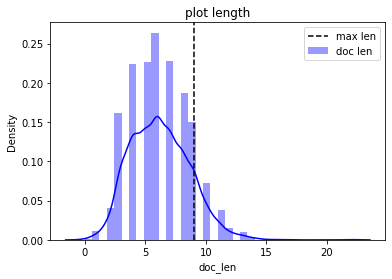

In [13]:
df['doc_len'] = df['heading'].apply(lambda words: len(words.split()))
max_seq_len = np.round(df['doc_len'].mean() + df['doc_len'].std()).astype(int)
sns.distplot(df['doc_len'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('plot length'); plt.legend()
plt.show()

In [14]:
!pip install faiss-cpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.6 MB 4.4 MB/s 


In [15]:
import faiss
encoded_data = model.encode(df.heading.tolist())
encoded_data = np.asarray(encoded_data.astype('float32'))
index = faiss.IndexIDMap(faiss.IndexFlatIP(768))
index1=faiss.IndexIDMap(faiss.IndexFlatIP(768))
index.add_with_ids(encoded_data, np.array(range(0, len(df))))
faiss.write_index(index, 'heading.index')
faiss.write_index(index1,'url.index')

In [16]:
df.head()

,heading,text,url,doc_len
0,Reasons to Buy Bajaj Allianz Travel Insurance,Whether you are planning a solo backpacking tr...,https://www.bajajfinservmarkets.in/insurance/t...,7
1,Why Travel Insurance is a Must-Have?,Why Travel Insurance is a Must-Have?What is th...,https://www.bajajfinservmarkets.in/insurance/t...,6
2,Why Choose Bajaj Allianz Travel Insurance?,Why Choose Bajaj Allianz Travel Insurance?You ...,https://www.bajajfinservmarkets.in/insurance/t...,6
3,Types of Travel Insurance Plans Available on F...,Types of Travel Insurance Plans Available on F...,https://www.bajajfinservmarkets.in/insurance/t...,9
4,Top Destination Covered Under Travel Insurance...,Top Destination Covered Under Travel Insurance...,https://www.bajajfinservmarkets.in/insurance/t...,10


In [17]:
def fetch_info(dataframe_idx):
    info = df.iloc[dataframe_idx]
    meta_dict = {}
    meta_dict['heading'] = info['heading']
    meta_dict['url']=info['url']
    return meta_dict
    
def search(query, top_k, index, model):
    t=time.time()
    query_vector = model.encode([query])
    top_k = index.search(query_vector, top_k)
    print('>>>> Results in Total Time: {}'.format(time.time()-t))
    top_k_ids = top_k[1].tolist()[0]
    top_k_ids = list(np.unique(top_k_ids))
    results =  [fetch_info(idx) for idx in top_k_ids]
    return results

In [18]:
from pprint import pprint

query="heolth"
word = Word(query)
result = word.correct()
print(result)

results=search(query, top_k=5, index=index, model=model)

for r in results:
    print(r)

>>>> Results in Total Time: 0.02261638641357422
{'heading': 'Travel Insurance Details', 'url': 'https://www.bajajfinservmarkets.in/insurance/travel-insurance/russia.html'}
{'heading': 'Canada Travel Insurance', 'url': 'https://www.bajajfinservmarkets.in/insurance/travel-insurance/canada.html'}
{'heading': 'USA Travel Insurance', 'url': 'https://www.bajajfinservmarkets.in/insurance/travel-insurance/usa.html'}
{'heading': 'Europe Travel Insurance', 'url': 'https://www.bajajfinservmarkets.in/insurance/travel-insurance/europe.html'}
{'heading': '3. Travel Insurance', 'url': 'https://www.bajajfinservmarkets.in/insurance/types-of-insurance.html'}


In [19]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch
tokenizer = T5Tokenizer.from_pretrained('BeIR/query-gen-msmarco-t5-large-v1')
model = T5ForConditionalGeneration.from_pretrained('BeIR/query-gen-msmarco-t5-large-v1')
model.eval()

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.81k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.75G [00:00<?, ?B/s]

T5ForConditionalGeneration(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=4096, bias=False)
              (wo): Linear(in_features=4096, out_features=1024, bias=False)
              (d

In [ ]:
device = 'cuda'
model.to(device)

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: DistilBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Dense({'in_features': 768, 'out_features': 768, 'bias': False, 'activation_function': 'torch.nn.modules.linear.Identity'})
)

In [20]:
# Parameters for generation
batch_size = 16 #Batch size
num_queries = 5 #Number of queries to generate for every paragraph
max_length_paragraph = 512 #Max length for paragraph
max_length_query = 64   #Max length for output query

In [21]:
def _removeNonAscii(s): return "".join(i for i in s if ord(i) < 128)

In [22]:
from sentence_transformers import SentenceTransformer, InputExample, losses, models, datasets
from torch import nn
import os
import random

train_examples = [] 
with open('/content/preprocess_dataset.csv') as fIn:
    for line in fIn:
        try:
            query, paragraph = line.strip().split('\t', maxsplit=1)
            train_examples.append(InputExample(texts=[query, paragraph]))
        except:
            pass
        
random.shuffle(train_examples)

# For the MultipleNegativesRankingLoss, it is important
# that the batch does not contain duplicate entries, i.e.
# no two equal queries and no two equal paragraphs.
# To ensure this, we use a special data loader
train_dataloader = datasets.NoDuplicatesDataLoader(train_examples, batch_size=8)

# Now we create a SentenceTransformer model from scratch
word_emb = models.Transformer('sentence-transformers/msmarco-distilbert-base-dot-prod-v3')
pooling = models.Pooling(word_emb.get_word_embedding_dimension())
model = SentenceTransformer(modules=[word_emb, pooling])


# MultipleNegativesRankingLoss requires input pairs (query, relevant_passage)
# and trains the model so that is is suitable for semantic search
train_loss = losses.MultipleNegativesRankingLoss(model)


#Tune the model
num_epochs = 3
warmup_steps = int(len(train_dataloader) * num_epochs * 0.1)
model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=num_epochs, warmup_steps=warmup_steps, show_progress_bar=True)

os.makedirs('search', exist_ok=True)
model.save('search/search-model')

Downloading:   0%|          | 0.00/554 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/253M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/376 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration: 0it [00:00, ?it/s]

Iteration: 0it [00:00, ?it/s]

Iteration: 0it [00:00, ?it/s]